In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_csv("loan_data_set.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
data["Gender"] = data["Gender"].fillna(data["Gender"].mode())
data["Married"] = data["Married"].fillna(data["Married"].mode())
data["Education"] = data["Education"].fillna(data["Education"].mode())
data["Self_Employed"] = data["Self_Employed"].fillna(data["Self_Employed"].mode())
data["Property_Area"] = data["Property_Area"].fillna(data["Property_Area"].mode())

In [7]:
data["LoanAmount"] = data["LoanAmount"].fillna(data["LoanAmount"].median())
data["Loan_Amount_Term"] = data["Loan_Amount_Term"].fillna(data["LoanAmount"].median())
data["Credit_History"] = data["Credit_History"].fillna(data["LoanAmount"].median())

In [8]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Label Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Gender"]= le.fit_transform(data["Gender"])
data["Married"]= le.fit_transform(data["Married"])
data["Education"]= le.fit_transform(data["Education"])
data["Self_Employed"]= le.fit_transform(data["Self_Employed"])
data["Property_Area"]= le.fit_transform(data["Property_Area"])
data["Loan_Status"]= le.fit_transform(data["Loan_Status"])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    int32  
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    int32  
 5   Self_Employed      614 non-null    int32  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(6), int64(1), object(2)
memory usage: 48.1+ KB


### Train Test Split

In [11]:
x=data.drop(columns=["Loan_Status","Loan_ID","Dependents"])
y=data["Loan_Status"]

In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

### Bagging Meta Estimator Classifier

In [13]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(n_estimators=100)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest) 

In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [15]:
print("Accuracy is :",accuracy_score(ytest,ypred))

Accuracy is : 0.8211382113821138


              precision    recall  f1-score   support

           0       0.70      0.58      0.63        33
           1       0.85      0.91      0.88        90

    accuracy                           0.82       123
   macro avg       0.78      0.74      0.76       123
weighted avg       0.81      0.82      0.82       123



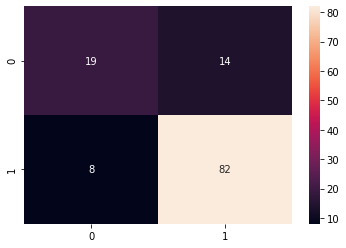

In [16]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True)
print(classification_report(ytest,ypred))

### Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
model=RandomForestClassifier(n_estimators=120)
model.fit(xtrain,ytrain) 
ypred=model.predict(xtest)

In [19]:
print("Accuracy is :",accuracy_score(ytest,ypred))

Accuracy is : 0.8048780487804879


              precision    recall  f1-score   support

           0       0.67      0.55      0.60        33
           1       0.84      0.90      0.87        90

    accuracy                           0.80       123
   macro avg       0.76      0.72      0.74       123
weighted avg       0.80      0.80      0.80       123



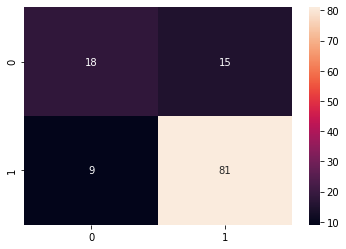

In [20]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True)
print(classification_report(ytest,ypred))

### Hyper Parameter Tuning

In [21]:
#parameter
max_features=["sqrt","log2"]
n_estimators=[5,10,100,1000]
grid={"max_features":max_features,"n_estimators":n_estimators}
#cv
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3)

In [22]:
from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=RandomForestClassifier(),param_grid=grid,cv=cv,scoring="accuracy")

In [23]:
res=grid_cv.fit(xtrain,ytrain)

In [24]:
print(res.best_params_)

{'max_features': 'log2', 'n_estimators': 1000}


In [25]:
print(res.best_score_)

0.7759727891156463
